<a href="https://colab.research.google.com/github/wreckweg/Face_Recognition_Project/blob/main/Image_augmentor_for_droneface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import cv2

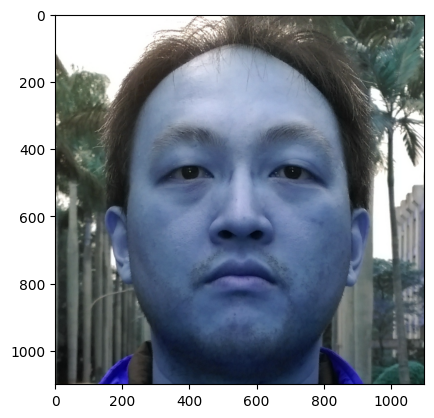

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Train/a/a_cam_0_porF_00.jpg')
plt.imshow(img)

In [ ]:
directory = '/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Train'
store_directory= '/content/drive/MyDrive/Face_recognisation/DroneFace_dataset/Train_aug/'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

for sub_dir in os.listdir(directory):
  sub_path= directory + '/' +sub_dir+ '/'
  for image in os.listdir(sub_path):
    im_path = sub_path + image
    img = load_img(im_path)
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir= store_directory +sub_dir , save_prefix= sub_dir, save_format='jpeg'):
        i += 1
        if i > 33:
            break  # otherwise the generator would loop indefinitely